In [60]:
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
df=pd.read_csv('soft.csv');
df.head(5)

,Time,Fault
0,0,0
1,1,6
2,2,1
3,3,1
4,4,0


In [61]:
length=len(df['Fault'])
sum=0;
for i in range(1,length):
    sum= sum+df['Fault'][i]
    df['Fault'][i]=sum
    #print(sum)



In [62]:
##Data Transformation when Lemda=zero
df['cvFault']=df['Fault']
df['cvFault']=df.cvFault.astype(float)
for i in range(1,55):
    df['cvFault'][i]=math.log( df['cvFault'][i],10)

    

<ipython-input-62-b68a73c0808b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cvFault'][i]=math.log( df['cvFault'][i],10)


In [63]:
#Test With First 21 data
First_TenDataFults=[];
First_TenDataInput=[];
for i in range(1,21):
    First_TenDataInput.append(i)
    First_TenDataFults.append(df['cvFault'][i])
    
mean_x=np.mean(First_TenDataInput)
mean_y=np.mean( First_TenDataFults)
print("mean x,y",mean_x,mean_y)


numer=0.0
dnum=0.0

for i in range(len(First_TenDataInput)):
    numer+=(First_TenDataInput[i]-mean_x)*(First_TenDataFults[i]-mean_y)
    dnum+=(First_TenDataInput[i]-mean_x)*(First_TenDataInput[i]-mean_x)
    

mean x,y 10.5 1.3216875714366967


In [64]:
cof_= numer/dnum
print(cof_)
intercept_=mean_y -(mean_x*cof_)
print(intercept_)

0.053260305935428985
0.7624543591146924


In [65]:
def predeict(x):
    return x*cof_+intercept_

In [66]:
predictResult=[]
for i in range(1,21):
    predictResult.append(predeict(i))
    
#predictResult

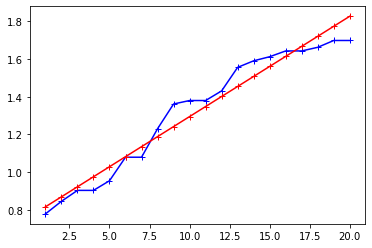

In [67]:


plt.xlabel='Year'
plt.ylabel='Fault'
#plt.scatter(df.Year,df.percent,color='RED', marker='+')
plt.plot(First_TenDataInput,First_TenDataFults,color='blue',marker='+')
plt.plot(First_TenDataInput,predictResult,color='RED',marker='+')

In [71]:
##PredictNext5data Analysis

totalError=0.0;
for i in range(21,31):
    print(predeict(i))
    temp=10** predeict(i);
    Error=abs(df['Fault'][i]- temp)
    totalError+=Error;

    tempP=(Error/temp)*100
    print("Input =",i,"Ex=",df['Fault'][i]," Pr",'%.2f'%temp," Error=",'%.2f'%Error," in percent Error",'%.2f'%tempP)

print("\n**Average Error for the Next 5  ", (totalError/10))                                                                  
                                                               
    

1.880920783758701
Input = 21 Ex= 50  Pr 76.02  Error= 26.02  in percent Error 34.23
1.93418108969413
Input = 22 Ex= 50  Pr 85.94  Error= 35.94  in percent Error 41.82
1.9874413956295591
Input = 23 Ex= 50  Pr 97.15  Error= 47.15  in percent Error 48.53
2.0407017015649878
Input = 24 Ex= 50  Pr 109.83  Error= 59.83  in percent Error 54.47
2.093962007500417
Input = 25 Ex= 52  Pr 124.15  Error= 72.15  in percent Error 58.12
2.147222313435846
Input = 26 Ex= 52  Pr 140.35  Error= 88.35  in percent Error 62.95
2.200482619371275
Input = 27 Ex= 52  Pr 158.67  Error= 106.67  in percent Error 67.23
2.253742925306704
Input = 28 Ex= 54  Pr 179.37  Error= 125.37  in percent Error 69.89
2.307003231242133
Input = 29 Ex= 57  Pr 202.77  Error= 145.77  in percent Error 71.89
2.3602635371775618
Input = 30 Ex= 68  Pr 229.23  Error= 161.23  in percent Error 70.33

**Average Error for the Next 5   78.95151051511101


In [49]:
#Test With First 21 data
First_TenDataFults=[];
First_TenDataInput=[];
for i in range(1,21):
    First_TenDataInput.append(i)
    First_TenDataFults.append(df['cvFault'][i])
    
mean_x=np.mean(First_TenDataInput)
mean_y=np.mean( First_TenDataFults)
print("mean x,y",mean_x,mean_y)


numer=0.0
dnum=0.0

for i in range(len(First_TenDataInput)):
    numer+=(First_TenDataInput[i]-mean_x)*(First_TenDataFults[i]-mean_y)
    dnum+=(First_TenDataInput[i]-mean_x)*(First_TenDataInput[i]-mean_x)
    
    
    
cof_= numer/dnum
print(cof_)
intercept_=mean_y -(mean_x*cof_)
print(intercept_)

def predeict(x):
    return x*cof_+intercept_

predictResult=[]
for i in range(1,21):
    predictResult.append(predeict(i))
    
#predictResult


mean x,y 10.5 1.3216875714366967
0.053260305935428985
0.7624543591146924


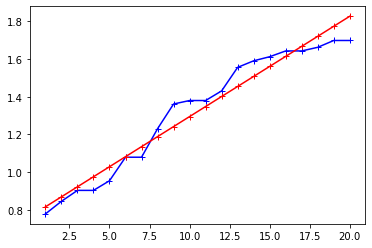

In [50]:


plt.xlabel='Year'
plt.ylabel='Fault'
#plt.scatter(df.Year,df.percent,color='RED', marker='+')
plt.plot(First_TenDataInput,First_TenDataFults,color='blue',marker='+')
plt.plot(First_TenDataInput,predictResult,color='RED',marker='+')